#  Preparing Data

In [9]:
import pandas as pd
from os import listdir
from os import path
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
# Create dataframe with all 1 month Data
n = 0 # counter to grab only first header
for file in listdir("Data/1month_5seasons/"):
    try: 
        dfa = pd.read_excel("Data/1month_5seasons/" + file, sheet_name = 1)
        n += 1
        header = dfa.iloc[0]  # current header is wrong
        if n == 1:
            df = pd.DataFrame(columns = header)
            df['Year'] = ''
        dfa = dfa[1:]  # Header is now duplicated
        dfa.columns = header
        year = path.splitext(file)[0]   # To add year as a column
        dfa["Year"] = len(dfa.index) * [year]
        df = pd.concat([dfa, df])
    except ValueError: # so non-excel files aren't grabbed
        pass

In [100]:
# Create New column that is name and year
df['Name_Year'] = df['Name'] + ' ' + df['Year']

In [101]:
df.head()

,Rk,Name,Team,Age,Pos,GP,G,A,P,PIM,...,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%,Year,Name_Year
1,1,Leon Draisaitl,EDM,26,F,14,15,16,31,6,...,2.214,47,31.9%,4,2,147,120,55.06%,2021-2022,Leon Draisaitl 2021-2022
2,2,Connor McDavid,EDM,24,F,14,10,17,27,4,...,1.929,59,17.0%,11,3,79,64,55.24%,2021-2022,Connor McDavid 2021-2022
3,3,Alexander Ovechkin,WSH,36,F,15,12,14,26,2,...,1.733,65,18.5%,18,5,1,1,50.00%,2021-2022,Alexander Ovechkin 2021-2022
4,4,Troy Terry,ANA,24,F,15,11,9,20,4,...,1.333,36,30.6%,1,6,0,3,0.00%,2021-2022,Troy Terry 2021-2022
5,5,Evgeny Kuznetsov,WSH,29,F,15,6,14,20,8,...,1.333,43,14.0%,4,5,119,126,48.57%,2021-2022,Evgeny Kuznetsov 2021-2022


In [102]:
# Remove goalie entries
df = df[df.Pos != "G"]
# Remove unnecessary columns
df = df.drop(['Rk','Team', 'Name', 'Year'], axis=1)

In [103]:
# Convert time stats (e.g., 20:12) to seconds.
# Define function that does the string conversion:
def time2sec(time):
    m, s = time.split(':')
    return 60 * int(m) + int(s)

df['TOI'] = df['TOI'].apply(time2sec) 
df['ES'] = df['ES'].apply(time2sec) 
df['PP'] = df['PP'].apply(time2sec) 
df['SH'] = df['SH'].apply(time2sec) 

In [104]:
# Convert Position to boolean (0 = D, 1 = F)
def Pos2bool(pos):
    if pos == "D":
        return 0
    if pos == "F":
        return 1
        
df['Pos'] = df['Pos'].apply(Pos2bool)

In [105]:
# Remove '%' symbol from columns
def perc_rem(string):
    return string.replace('%','')

df['PPP%'] = df['PPP%'].apply(perc_rem)
df['FO%'] = df['FO%'].apply(perc_rem)
df['SH%'] = df['SH%'].apply(perc_rem)

In [106]:
df.set_index('Name_Year')

,Age,Pos,GP,G,A,P,PIM,+/-,TOI,ES,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
Name_Year,,,,,,,,,,,,,,,,,,,,,
Leon Draisaitl 2021-2022,26,1,14,15,16,31,6,12,1374,1107,...,1.071,1.143,2.214,47,31.9,4,2,147,120,55.06
Connor McDavid 2021-2022,24,1,14,10,17,27,4,3,1347,1113,...,0.714,1.214,1.929,59,17.0,11,3,79,64,55.24
Alexander Ovechkin 2021-2022,36,1,15,12,14,26,2,14,1295,980,...,0.8,0.933,1.733,65,18.5,18,5,1,1,50.00
Troy Terry 2021-2022,24,1,15,11,9,20,4,4,1040,904,...,0.733,0.6,1.333,36,30.6,1,6,0,3,0.00
Evgeny Kuznetsov 2021-2022,29,1,15,6,14,20,8,9,1290,984,...,0.4,0.933,1.333,43,14.0,4,5,119,126,48.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alexandre Carrier 2022-2023,26,0,12,0,0,0,6,-2,1053,884,...,0,0,0,14,0.0,18,15,0,0,0.00
Markus Niemeläinen 2022-2023,24,0,12,0,0,0,4,0,603,544,...,0,0,0,7,0.0,39,7,0,0,0.00
Parker Kelly 2022-2023,23,1,12,0,0,0,18,-1,462,364,...,0,0,0,4,0.0,25,3,1,1,50.00


In [107]:
# Create dataframe with season-end Data
n = 0 # counter to grab only first header
for file in listdir("Data/end_5seasons/"):
    try: 
        dfa = pd.read_excel("Data/end_5seasons/" + file, sheet_name = 0)
        n += 1
        header = dfa.columns  # current header is wrong
        if n == 1:
            dfend = pd.DataFrame(columns = header)
            dfend['Year'] = ''
        dfa.columns = header
        year = path.splitext(file)[0]   # To add year as a column
        dfa["Year"] = len(dfa.index) * [year]
        dfend = pd.concat([dfa, dfend])
    except ValueError: # so non-excel files aren't grabbed
        pass

In [108]:
dfend

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS▼,+/-,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,-9999,Year,PTS
0,1,Connor McDavid,25.0,EDM,C,80,44,79,123,28,...,1765,22:04:00,26,75,562,484,53.7,mcdavco01,2021-2022,NaN
1,2,Johnny Gaudreau,28.0,CGY,LW,82,40,75,115,64,...,1523,18:34:00,9,10,1,0,100.0,gaudrjo01,2021-2022,NaN
2,3,Jonathan Huberdeau,28.0,FLA,LW,80,30,85,115,35,...,1554,19:25:00,28,99,18,36,33.3,huberjo01,2021-2022,NaN
3,4,Leon Draisaitl,26.0,EDM,C,80,55,55,110,17,...,1788,22:21:00,25,53,887,774,53.4,draisle01,2021-2022,NaN
4,5,Kirill Kaprizov,24.0,MIN,LW,81,47,61,108,27,...,1548,19:06:00,29,73,5,4,55.6,kapriki01,2021-2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,947,Riley Tufte,24.0,DAL,LW,3,0,0,0,-1,...,24,07:57:00,0,6,0,0,NaN,tufteri01,2022-2023,NaN
947,948,Alex Turcotte,21.0,LAK,C,4,0,0,0,-2,...,28,06:59:00,0,1,6,8,42.9,turcoal02,2022-2023,NaN
948,949,Jeffrey Viel,26.0,SJS,F,4,0,0,0,0,...,37,09:10:00,2,6,0,0,NaN,vielje01,2022-2023,NaN
949,950,Chris Wagner,31.0,BOS,C,1,0,0,0,0,...,13,12:36:00,1,6,1,3,25.0,wagnech01,2022-2023,NaN


In [109]:
# Create New column that is name and year
dfend['Name_Year'] = dfend['Player'] + ' ' + dfend['Year']

In [110]:
# Keep only name_year and points total
dfend = dfend[['Name_Year', 'PTS▼']]
dfend = dfend.rename(columns={'PTS▼': 'Pend'})
dfend.set_index('Name_Year')

,Pend
Name_Year,
Connor McDavid 2021-2022,123
Johnny Gaudreau 2021-2022,115
Jonathan Huberdeau 2021-2022,115
Leon Draisaitl 2021-2022,110
Kirill Kaprizov 2021-2022,108
...,...
Riley Tufte 2022-2023,0
Alex Turcotte 2022-2023,0
Jeffrey Viel 2022-2023,0


In [111]:
print(df.columns)

Index(['Age', 'Pos', 'GP', 'G', 'A', 'P', 'PIM', '+/-', 'TOI', 'ES', 'PP',
       'SH', 'ESG', 'PPG', 'SHG', 'GWG', 'OTG', 'ESA', 'PPA', 'SHA', 'GWA',
       'OTA', 'ESP', 'PPP', 'SHP', 'GWP', 'OTP', 'PPP%', 'G/60', 'A/60',
       'P/60', 'ESG/60', 'ESA/60', 'ESP/60', 'PPG/60', 'PPA/60', 'PPP/60',
       'G/GP', 'A/GP', 'P/GP', 'SHOTS', 'SH%', 'HITS', 'BS', 'FOW', 'FOL',
       'FO%', 'Name_Year'],
      dtype='object', name=0)


In [112]:
#Join the two datasets
df = df.set_index('Name_Year').join(dfend.set_index('Name_Year'))

In [113]:
#Remove rows where Pend is less than 10
df = df[df.Pend > 9]

In [114]:
df

,Age,Pos,GP,G,A,P,PIM,+/-,TOI,ES,...,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%,Pend
Name_Year,,,,,,,,,,,,,,,,,,,,,
A.J. Greer 2022-2023,26,1,10,3,3,6,19,2,616,613,...,0.3,0.6,11,27.3,25,6,0,0,0.00,12
Aaron Ekblad 2017-2018,21,0,14,3,4,7,21,5,1418,1068,...,0.286,0.5,33,9.1,10,23,0,0,0.00,38
Aaron Ekblad 2018-2019,22,0,11,0,2,2,8,0,1353,1100,...,0.182,0.182,26,0.0,16,4,0,0,0.00,37
Aaron Ekblad 2021-2022,25,0,15,4,7,11,4,10,1542,1117,...,0.467,0.733,44,9.1,16,14,0,0,0.00,57
Aaron Ekblad 2022-2023,26,0,3,1,0,1,4,1,1301,909,...,0,0.333,7,14.3,4,1,0,0,0.00,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zack Smith 2018-2019,30,1,9,2,3,5,9,2,937,811,...,0.333,0.556,11,18.2,21,8,78,73,51.66,28
Zemgus Girgensons 2017-2018,23,1,12,1,2,3,4,1,764,667,...,0.167,0.25,16,6.3,20,6,2,10,16.67,15
Zemgus Girgensons 2018-2019,24,1,15,1,4,5,0,2,842,647,...,0.267,0.333,19,5.3,24,6,11,7,61.11,18


# Exploratory Data Analysis

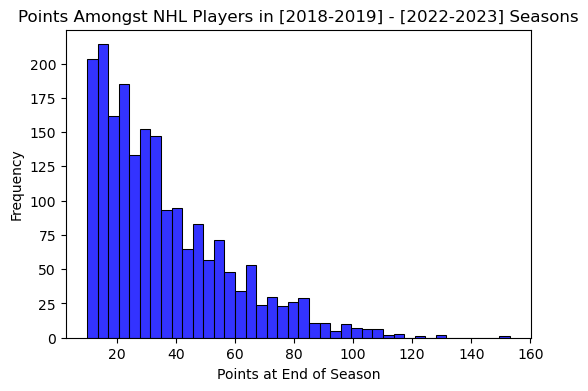

In [116]:
plt.figure(figsize=(6, 4))

sns.histplot(df.Pend, bins=40, color='blue', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Points at End of Season')
plt.title('Points Amongst NHL Players in [2018-2019] - [2022-2023] Seasons')

plt.show()

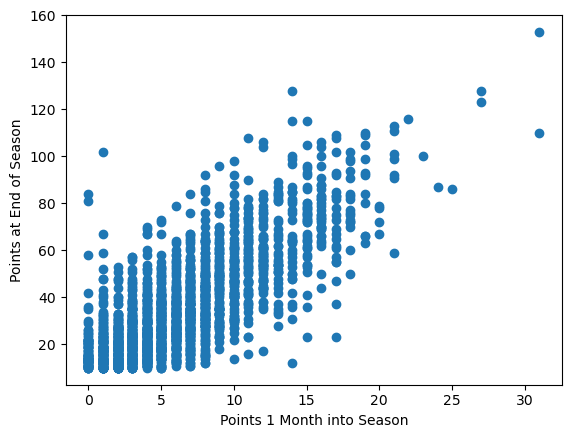

In [117]:
plt.scatter(df.P, df.Pend)

plt.ylabel('Points at End of Season')
plt.xlabel('Points 1 Month into Season')
plt.show()

# Split Data

In [118]:
# Convert all data to numerical values
for col in list(df.columns):
    df[col] = pd.to_numeric(df[col])

In [119]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [120]:
n, n_val + n_test + n_train

(1992, 1992)

In [121]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [122]:
y_train = df_train.Pend
y_val = df_val.Pend
y_test = df_test.Pend

del df_train['Pend']
del df_val['Pend']
del df_test['Pend']

# Linear Regression

In [123]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Try Regressing

In [124]:
base = list(df_train.columns)

In [125]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [126]:
X_train = prepare_X(df_train)

In [127]:
w_0, w = train_linear_regression(X_train, y_train)

In [128]:
y_train_pred = w_0 + X_train.dot(w)


X_val = prepare_X(df_val)
y_val_pred = w_0 + X_val.dot(w)

## Evaluate Accuracy

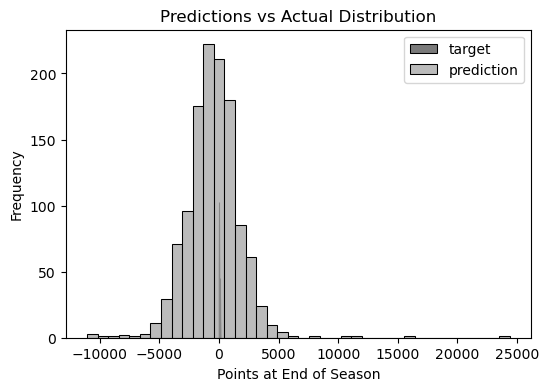

In [129]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Points at End of Season')
plt.title('Predictions vs Actual Distribution')

plt.show()

In [130]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def mae(y, y_pred):
    error = abs(y_pred - y)
    return error.mean()

In [131]:
print('train:', '\n rmse =', rmse(y_train, y_train_pred), '\n mae = ', mae(y_train, y_train_pred))
print('validation:', '\n rmse =', rmse(y_val, y_val_pred), '\n mae = ', mae(y_val, y_val_pred))

train: 
 rmse = 2348.890918773148 
 mae =  1693.8815944960688
validation: 
 rmse = 2453.6505569274955 
 mae =  1828.8864328085806


# Regularization

In [132]:
# The columns of df are not linearly independent (e.g., P = G + A), so we have to add some regularization.

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [133]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
y_train_pred = w_0 + X_train.dot(w)


X_val = prepare_X(df_val)
y_val_pred = w_0 + X_val.dot(w)

In [134]:
print('train:', '\n rmse =', rmse(y_train, y_train_pred), '\n mae = ', mae(y_train, y_train_pred))
print('validation:', '\n rmse =', rmse(y_val, y_val_pred), '\n mae = ', mae(y_val, y_val_pred))

train: 
 rmse = 10.89297208957981 
 mae =  8.172803055512606
validation: 
 rmse = 12.971636867988883 
 mae =  9.147192906289522


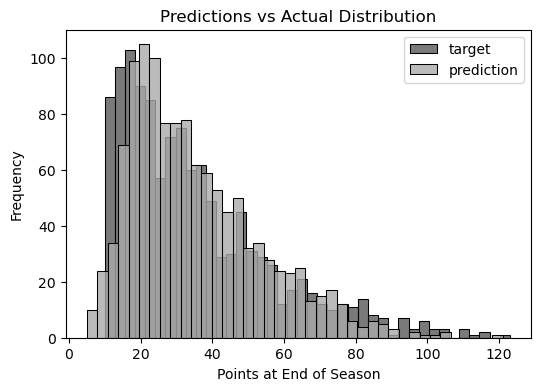

In [135]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_train_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Points at End of Season')
plt.title('Predictions vs Actual Distribution')

plt.show()

## Use the model to predict

In [136]:
df_test.reset_index()

,Name_Year,Age,Pos,GP,G,A,P,PIM,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,Oliver Ekman-Larsson 2021-2022,30,0,16,1,2,3,20,2,1374,...,0.063,0.125,0.188,49,2.0,23,13,0,0,0.00
1,Matt Duchene 2018-2019,27,1,14,4,8,12,0,-4,1125,...,0.286,0.571,0.857,27,14.8,7,11,128,113,53.11
2,Mathieu Perreault 2018-2019,30,1,14,2,1,3,2,1,655,...,0.143,0.071,0.214,22,9.1,17,1,11,8,57.89
3,Wayne Simmonds 2021-2022,33,1,15,1,2,3,11,-2,568,...,0.067,0.133,0.200,28,3.6,28,3,1,2,33.33
4,Joonas Donskoi 2018-2019,26,1,14,3,5,8,2,1,845,...,0.214,0.357,0.571,25,12.0,13,10,1,5,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Lawson Crouse 2021-2022,24,1,15,4,3,7,22,-3,1079,...,0.267,0.200,0.467,36,11.1,35,6,1,5,16.67
394,Jesse Puljujärvi 2021-2022,23,1,14,6,8,14,8,6,1079,...,0.429,0.571,1.000,30,20.0,17,2,0,0,0.00
395,Adam Pelech 2017-2018,23,0,12,0,4,4,10,5,1095,...,0.000,0.333,0.333,7,0.0,19,17,0,0,0.00
396,Adam Gaudette 2021-2022,25,1,8,1,1,2,4,-3,631,...,0.125,0.125,0.250,10,10.0,9,1,2,3,40.00


In [137]:
i = 1
guy = df_test.iloc[i].to_dict()

In [138]:
X_test = prepare_X(pd.DataFrame([guy]))[0]
y_pred = w_0 + X_test.dot(w)
y_pred

57.483918774114386

In [139]:
y_test

Name_Year
Oliver Ekman-Larsson 2021-2022    29
Matt Duchene 2018-2019            70
Mathieu Perreault 2018-2019       30
Wayne Simmonds 2021-2022          16
Joonas Donskoi 2018-2019          37
                                  ..
Lawson Crouse 2021-2022           34
Jesse Puljujärvi 2021-2022        36
Adam Pelech 2017-2018             19
Adam Gaudette 2021-2022           14
Ryan Graves 2022-2023             26
Name: Pend, Length: 398, dtype: int64